# Text Classification Bag of Words

Outline
- Download and explore the data
- Apply text processing techniques
- Implement bag of words model
- Train ML models for text classification
- Make predictions and publish to kaggle


## Download and explore the data

In [3]:
!pip3 install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import os


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [6]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [8]:
import pandas as pd


In [9]:
raw_df = pd.read_csv(train_fname)
raw_df
# insincere questions has target as 1 otherwise 0.

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [10]:
sincere_df = raw_df[raw_df['target'] == 0]
insincere_df = raw_df[raw_df['target'] == 1]
insincere_df['question_text'].values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [11]:
raw_df['target'].value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

<Axes: xlabel='target'>

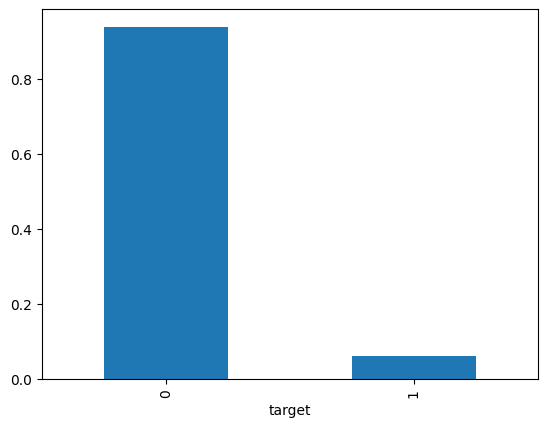

In [12]:
raw_df['target'].value_counts(normalize=True).plot(kind='bar')

In [13]:
test_df = pd.read_csv(test_fname)
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [14]:
sub_df = pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [15]:
SAMPLE_SIZE = 100_000

In [16]:
#Create working sample of data
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Apply text processing techniques
Outline:
1. Undertsand the Bag of Words model
2. Tokenisation
3. Stop word removal
4. Stemming

#### Bag of Words Intuition
1. Create list of all the words across all the text documents
2. Convert each document into a vector containing the counts of each word

Limitations:
1. There may be too many words
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. Single word can have many forms (eg: go, gone, going or bird, birds)


#### Tokenisation
Splitting the document into  words and separators

In [17]:
q0 = sincere_df['question_text'].values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [18]:
q1 = raw_df[raw_df['target'] == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

In [19]:
!pip3 install nltk


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [20]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/in22417145/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
q0_tok = word_tokenize(q0)
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [22]:
q1_tok = word_tokenize(q1)
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

#### Stop Word Removal

Removing commonly occurring words


In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/in22417145/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
english_stopwords = stopwords.words('english')
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [26]:
q0_stop = remove_stopwords(q0_tok)
q0_stop


['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [27]:
q1_stop = remove_stopwords(q1_tok)
q1_stop

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

#### Stemming
Moving words to the root word eg: go, gone, going -> go

In [28]:
from nltk.stem import SnowballStemmer

In [29]:
stemmer = SnowballStemmer(language='english')

In [30]:
stemmer.stem('going')

'go'

In [31]:
q0_stem = [stemmer.stem(word) for word in q0_stop]
q0_stem

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [32]:
q1_stem = [stemmer.stem(word) for word in q1_stop]
q1_stem

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

In [33]:
# We can use Lemmatization instead of Stemmer which gives meaningful words but it is not generally used as it looks for dictionary words and
# can result in slowness 

## Implement bag of words model

Outline:
- Create a vocabulary using Count Vectorizer
- Transform text to Vectors using Count Vectorizer
- Configure Text Preprocessing in Count Vectorizer


#### Create a Vocabulary

In [34]:
small_df = sample_df[:5]
small_df['question_text']

443046     What is the most effective classroom managemen...
947549     Can I study abroad after 10th class from Bangl...
523769           How can I make friends as a college junior?
949821     How do I download free APK Minecraft: Pocket E...
1030397    Like Kuvera, is "Groww" also a free online inv...
Name: question_text, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer


In [36]:
small_vect = CountVectorizer()

In [37]:
small_vect.fit(small_df['question_text'])

CountVectorizer()

In [38]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [39]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

#### Transform documents to vector

In [40]:
vectors = small_vect.transform(small_df['question_text']).toarray()
vectors

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

#### Configure Count Vectorizer Parameter

In [41]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [42]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [43]:
%%time
vectorizer.fit(sample_df['question_text'])

/Library/Python/3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 11.9 s, sys: 246 ms, total: 12.1 s
Wall time: 12.3 s


CountVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x33b4b7e50>)

In [44]:
len(vectorizer.vocabulary_)

1000

In [45]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [46]:
inputs = vectorizer.transform(sample_df['question_text'])

In [47]:
inputs.shape

(100000, 1000)

In [48]:
test_inputs = vectorizer.transform(test_df['question_text'])

## Train ML models for text classification

- Create a training and validation set
- Train a logistic regression model
- Make predictions on training, validation and test data

#### Create Training and Validation Set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_inputs, val_inputs, train_targets, val_targets  = train_test_split(inputs, sample_df['target'], test_size=0.3, random_state=42)

In [51]:
train_inputs.shape, val_inputs.shape

((70000, 1000), (30000, 1000))

#### Train Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(train_inputs, train_targets)

LogisticRegression()

#### Make Predictions

In [55]:
train_preds = model.predict(train_inputs)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
pd.Series(train_preds).value_counts()

0    68004
1     1996
Name: count, dtype: int64

In [57]:
pd.Series(train_targets).value_counts()

target
0    65784
1     4216
Name: count, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(train_targets, train_preds)

0.9511714285714286

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(train_targets, train_preds)

np.float64(0.44977462974887317)

In [62]:
val_preds = model.predict(val_inputs)
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_score(val_targets, val_preds)

0.9478666666666666

In [64]:
f1_score(val_targets, val_preds)

np.float64(0.4155455904334828)

In [65]:
sincere_df['question_text'].values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [66]:
sincere_df['target'].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
# Lets test our model on some of the sincere questions above
model.predict(vectorizer.transform(sincere_df['question_text'].values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [68]:
model.predict(vectorizer.transform(insincere_df['question_text'].values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Make predictions and publish to kaggle

In [69]:
test_preds = model.predict(test_inputs)

In [70]:
sub_df['prediction'] = test_preds
sub_df['prediction'].value_counts()

prediction
0    365192
1     10614
Name: count, dtype: int64

In [71]:
sub_df.to_csv('submission.csv', index=None)

# Solution Using Pytorch

In [72]:
import torch

In [76]:
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [78]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [81]:
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [82]:
test_input_tensors = torch.tensor(test_inputs.toarray()).float()

## Create Pytorch Data Loader
(Pytorch cannot process all the records in a single run. It has to be done in batches. And this is done using Data Loader)


In [83]:
from torch.utils.data import TensorDataset, DataLoader

In [84]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_input_tensors)

In [85]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [86]:
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=128)
test_dl = DataLoader(test_ds, batch_size=128)

In [87]:
for batch in train_dl:
    batch_inputs = batch[0]
    batch_targets = batch[1]
    print('batch_inputs_shape',batch_inputs.shape)
    print('batch_targets_shape',batch_targets.shape)
    break

batch_inputs_shape torch.Size([128, 1000])
batch_targets_shape torch.Size([128])


## Train Deep Learning Model

In [113]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score

In [92]:
class QuoraNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1000, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 1)

    def forward(self, inputs):
        out = self.layer1(inputs)
        out = F.relu(out)
        out = self.layer2(out)
        out = F.relu(out)
        out = self.layer3(out)
        out = F.relu(out)
        out = self.layer4(out)
        return out
        

In [93]:
model_torch = QuoraNet()

In [115]:
for batch in train_dl:
    bi, bt = batch
    print('batch_inputs_shape',bi.shape)
    print('batch_targets_shape',bt.shape)

    bo = model_torch(bi)
    print('bo_shape',bo.shape)

    # Convert outputs to probabilities
    torch_probs = torch.sigmoid(bo[:,0])
    print('probs',torch_probs[:10])

    # Convert probabilities to predictions
    torch_preds = (torch_probs > 0.5).float()
    print('preds',torch_preds[:10])
    print('targets',bt[:10])

    # Check metrics
    acc = accuracy_score(bt, torch_preds)
    print('acc',acc)
    f1 = f1_score(bt, torch_preds)
    print('f1',f1)

    # Loss
    loss = F.binary_cross_entropy(torch_preds, bt)
    print('loss',loss)
    break

batch_inputs_shape torch.Size([128, 1000])
batch_targets_shape torch.Size([128])
bo_shape torch.Size([128, 1])
probs tensor([0.5008, 0.5013, 0.5012, 0.5016, 0.5011, 0.5010, 0.5014, 0.5010, 0.5016,
        0.5017], grad_fn=<SliceBackward0>)
preds tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
acc 0.0390625
f1 0.07518796992481203
loss tensor(96.0938)


In [97]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
bo[:10]

tensor([[0.0068],
        [0.0052],
        [0.0049],
        [0.0059],
        [0.0041],
        [0.0044],
        [0.0052],
        [0.0052],
        [0.0053],
        [0.0045]], grad_fn=<SliceBackward0>)

In [127]:
# Evaluate Model's performance
def evaluate(model, dl):

    losses, accs, f1s = [], [], []

    # Loop over baches
    for batch in dl:
        # Get inputs and targets
        inputs, targets = batch

        # Pass inputs through model
        outputs = model(inputs)

        # Convert to Probablities
        probs = torch.sigmoid(outputs[:,0])

        # Compute loss
        loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

        # Convert to Predictions
        preds = (probs > 0.5).float()

        # Compute accuracy and f1 score
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        losses.append(loss)
        accs.append(acc)
        f1s.append(f1)

    return (torch.mean(torch.tensor(losses)).item(), 
            torch.mean(torch.tensor(accs)).item(), 
            torch.mean(torch.tensor(f1s)).item())

    

In [117]:
evaluate(model=model_torch, dl=train_dl)

(0.6954358816146851, 0.06548911333084106, 0.11107425253522737)

In [118]:
evaluate(model=model_torch, dl=val_dl)

(0.6954414248466492, 0.06579122692346573, 0.11234685196572386)

In [128]:
# Train the Model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):

    history = []
    # Create an optimiser
    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # epoch is number of times the data has to be passed through a model
    for epoch in range(epochs):
        # Training phase
        for batch in train_dl:
            # Get inputs and targets
            inputs, targets = batch

            # Get model outputs
            outputs = model(inputs)

            # Get probablilities
            probs = torch.sigmoid(outputs[:,0])

            # Compute the loss
            loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))
                                          
            # Perform the optimisation
            loss.backward()
            opt.step()
            opt.zero_grad()

        # Evaluation phase
        loss, acc, f1 = evaluate(model, val_dl)
        print('Epoch :', epoch+1, 'Loss:', loss, 'Acc:', acc, 'F1:', f1)

        history.append((loss, acc, f1))

    return history

In [130]:
model_torch_new = QuoraNet()

In [142]:
history = []

In [143]:
history.append(evaluate(model=model_torch_new, dl=val_dl))
history


[(10.906378746032715, 0.9393506646156311, 0.4037277382084507)]

In [144]:
history += fit(5, 0.00001, model_torch_new, train_dl, val_dl)

Epoch : 1 Loss: 10.969192504882812 Acc: 0.9392509460449219 F1: 0.4065926565352621
Epoch : 2 Loss: 11.155344009399414 Acc: 0.9392176866531372 F1: 0.40575519500590307
Epoch : 3 Loss: 11.27487564086914 Acc: 0.9394171237945557 F1: 0.40633891765306035
Epoch : 4 Loss: 11.356583595275879 Acc: 0.9393839240074158 F1: 0.40518606099903376
Epoch : 5 Loss: 11.483269691467285 Acc: 0.9395833611488342 F1: 0.4069491390632949


In [147]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [148]:
from matplotlib import pyplot as plt

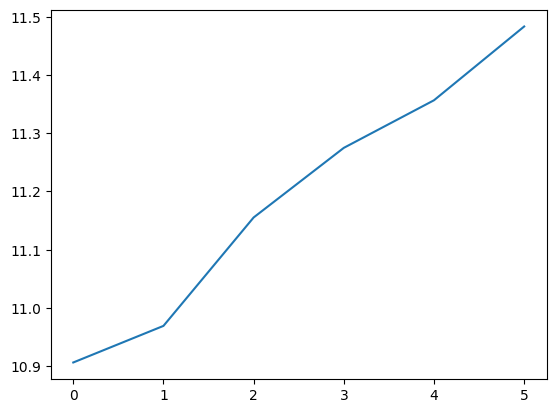

In [149]:
plt.plot(losses, label='Loss')


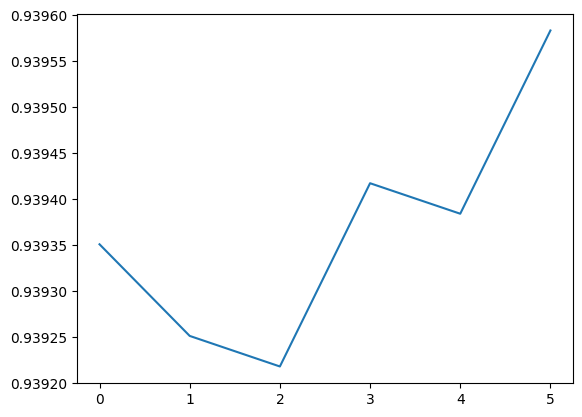

In [150]:
plt.plot(accs, label='Accuracy')

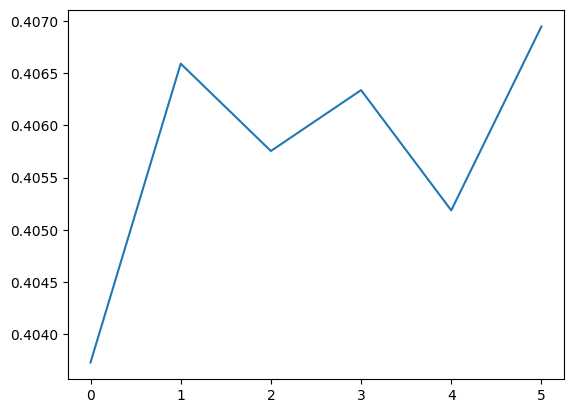

In [151]:
plt.plot(f1s, label='F1 Score')

## Make Predictions on example data

In [206]:
small_df_new = raw_df.sample(10)
small_df_new

,qid,question_text,target
1268332,f891e5bdd8c73a887cc2,"How do Muslims, Christians and Parsi Indians f...",1
1031668,ca292949162d1cc71bab,Which is the best laptop repair shop in Calgar...,0
1281103,fb12809d5260444a6868,What is the mythology behind ASTERIA the Greek...,0
988077,c193a816f50500484258,Would a relationship between a businessman and...,0
493104,608e0f344d3dc7a9bc33,Is Wafarin bad for artery health? Does it bloc...,0
650863,7f7b6b4ea130d6fd08da,When did Quora become a clearinghouse for stup...,1
297180,3a2f5caadbf38b64856c,What is the short form of director?,0
384795,4b62140b783563c62d88,What are negative effects of advertising?,0
1108429,d935546d1039247c2b58,Why are there so many ongoing separatist movem...,0
122371,17f33d7c95c3cd89fd6d,Why had refugees come into India at the time o...,0


In [207]:
def predict_df(df):
    input_tensors = torch.tensor(vectorizer.transform(df['question_text']).toarray()).float()
    outputs = model_torch_new(input_tensors)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    return preds


In [208]:
small_df_new['question_text'].values

array(["How do Muslims, Christians and Parsi Indians feel when they are taunted by others for being a follower of a 'foreign' religion? What do they believe is a fitting reply to such remarks?",
       'Which is the best laptop repair shop in Calgary, Canada?',
       'What is the mythology behind ASTERIA the Greek goddess?',
       'Would a relationship between a businessman and a humanitarian work out?',
       'Is Wafarin bad for artery health? Does it block protective effects of eating vitamin K foods or only effect the clotting cascade?',
       'When did Quora become a clearinghouse for stupid questions about Trump and other alt-right junk?',
       'What is the short form of director?',
       'What are negative effects of advertising?',
       'Why are there so many ongoing separatist movements in all over Asia and Southeast Asia but not in Vietnam, a multi-ethnic country?',
       'Why had refugees come into India at the time of its independence?'],
      dtype=object)

In [209]:
predict_df(small_df_new)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=torch.int32)

In [210]:
# Predict own text whether it is a sincere question or not
def predict_text(question):
    df = pd.DataFrame({'question_text': [question]})
    input_tensors = torch.tensor(vectorizer.transform(df['question_text']).toarray()).float()
    outputs = model_torch_new(input_tensors)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    return preds

In [211]:
predict_text('What is the capital of India?')

tensor([0], dtype=torch.int32)

In [213]:
predict_text('Why is muslim population growing in the world?')

tensor([1], dtype=torch.int32)

## Generate Predictions for th e test data

In [222]:
import numpy as np

In [223]:
def make_preds(dl):
    all_preds = []
    for batch in dl:
        inputs = batch[0]
        outputs = model_torch_new(inputs)
        probs = torch.sigmoid(outputs[:,0])
        preds = (probs > 0.5).int()
        all_preds.append(preds.numpy())
    return np.concatenate(all_preds)
    

In [224]:
test_preds = make_preds(test_dl)

In [225]:
test_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [226]:
pd.Series(test_preds).value_counts()

0    359076
1     16730
Name: count, dtype: int64

In [227]:
sub_df['prediction'] = test_preds

In [228]:
sub_df.to_csv('submission_torch.csv', index=None)